# Experiment 1: Document at various level for short dataset(law:non-law)

## 1. LSA at Article level

In the file each article is seperated by 'NEW_ARTICLE'

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx
import mantel

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Implementing LSA on law-texts-all.txt (law-articles)

In [2]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    function: loading text file
    Output : number of words, document list
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == 'NEW_ARTICLE':
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list_law,titles_law,word_count_law = load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 3


In [4]:
document_list_law

['REGINA v SECRETARY OF STATE FOR THE HOMEDEPARTMENT, Ex parte HINDLEY[COURT OF APPEAL][2000] 1 QB 152HEARING-DATES: 5, 6, 7, October 5 November 19985 November 1998CATCHWORDS:Prisons - Prisoners\' rights - Release on licence - Mandatory life sentence prisoner - Tariff element of determinate length provisionally fixed but not communicated to prisoner - Whole life tariff subsequently fixed and communicated - Policy of review of whole life tariff limited to considerations of retribution and deterrence but later amended to take account of exceptional circumstances - Whether increase from determinate tariff to whole life tariff lawful - Whether review policy lawful - Criminal Justice Act 1991 (c. 53), s. 35 - Crime (Sentences) Act 1997 (c. 43), s. 29HEADNOTE:In 1966 the applicant and a co-defendant were convicted of the murder of two children and received mandatory life sentences. The applicant was also convicted of being an accessory after the fact to the murder of a third child, of which 

In [5]:
def preprocess_data(doc_set):
    """
    Input  : list of documents
    function: text preprocessing - word tokenize, removing english stopwords, and potter stemming 
    Output : clean text
    """
    # initialize regex tokenizer
    word_tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    eng_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    po_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = word_tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>3]
        print(tokens)
        # removing english stop words from tokens
        stopped_tokens = [i for i in tokens if not i in eng_stop]
        # stemmed tokens
        stem_tokens = [po_stemmer.stem(i) for i in stopped_tokens]
        # list of tokens
        texts.append(stem_tokens)
    return texts

In [6]:
clean_text_law=preprocess_data(document_list_law)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley', 'court', 'appeal', '2000', '152hearing', 'dates', 'october', 'november', '19985', 'november', '1998catchwords', 'prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997', '29headnote', '1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 'being

In [7]:
def prepare_corpus(doc_clean):
    """
    Input  : preprossed document
    function: creating term dictionary and document term matrix
    Output : term dictionary and Document Term Matrix
    """
    # every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    term_dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    docu_term_matrix = [term_dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return term_dictionary,docu_term_matrix

In [8]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : preprocessed document, number of topics and word count
    function: create LSA model using gensim
    Output : return LSA model
    """
    term_dictionary,docu_term_matrix=prepare_corpus(doc_clean)
    # LSA model
    lsamodel = LsiModel(docu_term_matrix, num_topics=number_of_topics, id2word = term_dictionary)  # train model
    return lsamodel

In [9]:
# LSA Model
number_of_topics_law = len(document_list_law)
words = word_count_law
model_law = create_gensim_lsa_model(clean_text_law,number_of_topics_law,words)
words_from_law = dict(model_law.show_topic(0, topn=words))#dict and encoding matrix values

In [10]:
#These variables are for further experimentation in vertical comparission mantel test
model_law_articles = create_gensim_lsa_model(clean_text_law,number_of_topics_law,words)

In [11]:
top_words_law = dict(model_law.show_topic(0,topn=5)) 

In [12]:
#Top 5 words from the corpus using lsa
top_words_law

{'tariff': 0.332938497165633,
 'secretari': 0.331477202112737,
 'prison': 0.24915911995674642,
 'life': 0.2361170851923653,
 'sentenc': 0.22952296370340383}

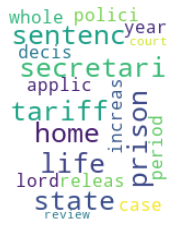

In [13]:
#WordCloud_API
from wordcloud import WordCloud
text = dict(model_law.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph.png')

Cosine-similarity

In [14]:
#Generating Cosine_similarity matrix for top 5 words

a=pd.DataFrame()

for i in range(number_of_topics_law):
    words_from_law =dict(model_law.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()


df = pd.DataFrame(columns=list(top_words_law.keys()), 
                  index = list(top_words_law.keys()))

l = list(top_words_law.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled.png')

cosine-similarity
             tariff secretari    prison      life   sentenc
tariff            1  0.983798  0.752886  0.981629  0.574831
secretari  0.983798         1  0.684687  0.938672  0.427497
prison     0.752886  0.684687         1  0.853834  0.833889
life       0.981629  0.938672  0.853834         1  0.712817
sentenc    0.574831  0.427497  0.833889  0.712817         1


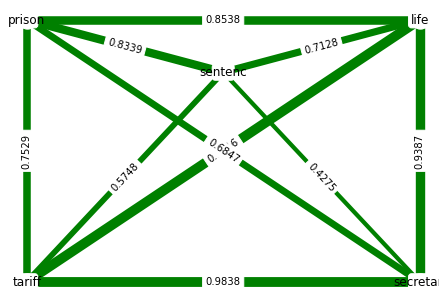

In [15]:
#Generating NetworkX graph for top 5 words from the corpus
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words_law.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig.png')

### Implementing LSA on non-law-all.txt

In [16]:
#loading non-law-all.txt
document_list_nonlaw,titles_nonlaw,word_count_nonlaw = load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 4


In [17]:
#data_processing function
clean_text_nonlaw=preprocess_data(document_list_nonlaw)

['hardest', 'case', 'myra', 'hindley', 'life', 'sentences', 'rule', 'lawmyra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction', 'twomurders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known', 'asthe', 'moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousnessof', 'society', 'exaggeration', 'that', 'hindley', 'popularlyconsidered', 'embodiment', 'evil', 'over', 'last', 'years', 'hasmounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine', 'thelength', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hardcase', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom', 'thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'positionof', 'home', 'secretary', 'hardened', 'main', 'because', 'politicalimpact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'becausehindley', 'mandatory', 'life', 'prisoner', 'case', 'profoundimpact', 'relating', 'such', 'prisoners', 'prevented', 'fromremain

In [18]:
# LSA Model
number_of_topics_nonlaw=len(document_list_nonlaw)
words=word_count_nonlaw
model_nonlaw=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics_nonlaw,words)
words_from_nonlaw =dict(model_nonlaw.show_topic(0, topn=words))#dict and encoding matrix values

In [19]:
#These variables are for further experimentation in vertical comparission mantel test
model_nonlaw_articles=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics_nonlaw,words)

In [20]:
top_words_nonlaw = dict(model_nonlaw.show_topic(0,topn=5))

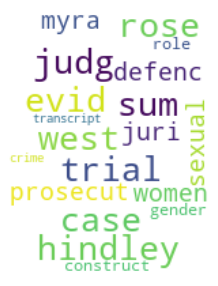

In [21]:
#generating wordcloud for top 10 words from lsa
from wordcloud import WordCloud
text = dict(model_nonlaw.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph1.png')

cosine similarity

In [22]:
#Generating Cosine Similarity matrix for top 5 words from corpus(non_law)
a=pd.DataFrame()

for i in range(number_of_topics_nonlaw):
    words_from_nonlaw =dict(model_nonlaw.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_nonlaw,index=[i])
    a=a.append(b)

a=a.transpose()


df = pd.DataFrame(columns=list(top_words_nonlaw.keys()), 
                  index = list(top_words_nonlaw.keys()))

l = list(top_words_nonlaw.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled1.png')

cosine-similarity
           judg      evid      west     trial      case
judg          1  0.985121  0.513522  0.985122  0.594254
evid   0.985121         1  0.578296  0.985766  0.466265
west   0.513522  0.578296         1  0.652864  0.273676
trial  0.985122  0.985766  0.652864         1  0.572048
case   0.594254  0.466265  0.273676  0.572048         1


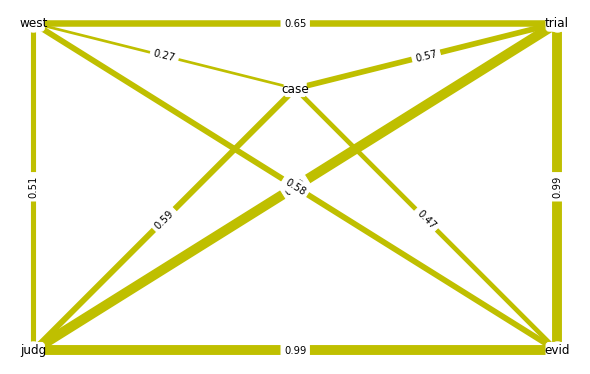

In [23]:
#Generating NetworkX for top 5 words
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words_nonlaw.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig1.png')

In [24]:
#Defining function for mantel test
def mantel_test_n(n):
    
    #All words from two corpus(mantel spaces)
    words_law_article = dict(model_law.show_topic(0, topn=word_count_law))
    words_nonlaw_article = dict(model_nonlaw.show_topic(0, topn=word_count_nonlaw))
    
    #Top 5 words from two corpus(mantel spaces)
    top_words_law_article = dict(model_law.show_topic(0, topn=n)) 
    top_words_nonlaw_article = dict(model_nonlaw.show_topic(0,topn=n)) 

    #Finding out the weights of top 5 law words in non law dataset and updating top words in nonlaw dataset
    c={} 
    for key in top_words_law_article:
        try:
            c[key] = words_nonlaw_article[key]
        except KeyError:
            c[key] = 0

    top_words_nonlaw_article.update(c)
    
    #Finding out the weights of top 5 non_law words in law dataset and updating top words in law dataset
    b={}
    for key in top_words_nonlaw_article:
        try:
            b[key] = words_law_article[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_law_article)
    top_words_law_article=b

    #Generating pairwise distance matrix for law top words
    a=pd.DataFrame()

    for i in range(number_of_topics_law):
        words_from_law =dict(model_law.show_topic(i, topn=word_count_law))
        b=pd.DataFrame(words_from_law,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_law_article.keys()), 
                      index = list(top_words_law_article.keys()))

    l = list(top_words_law_article.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.empty((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()

    #Generating pairwise distance matrix for nonlaw top words
    a=pd.DataFrame()

    for i in range(number_of_topics_nonlaw):
        words_from_nonlaw =dict(model_nonlaw.show_topic(i, topn=word_count_nonlaw))
        b=pd.DataFrame(words_from_nonlaw,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_nonlaw_article.keys()), 
                      index = list(top_words_nonlaw_article.keys()))

    l = list(top_words_nonlaw_article.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.empty((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()

    dist1 = list(df1[np.triu_indices(len(top_words_law_article), k = 1)])

    dist2 = list(df2[np.triu_indices(len(top_words_nonlaw_article), k = 1)])

    return mantel.test(dist1, dist2, perms=10000, method='pearson', tail='upper')

In [25]:
#calling mantel test for 10 word network(top 5 words from each dataset)
mantel_test_n(5)

Pairwise-distance
                judg         evid       west      trial      case     tariff  \
judg               0     0.121699   0.100146  0.0500752  0.175308   0.318453   
evid        0.121699  6.58545e-10  0.0373203  0.0783724  0.167005   0.347887   
west        0.100146    0.0373203          0    0.05688  0.188194    0.35091   
trial      0.0500752    0.0783724    0.05688          0   0.17354   0.344125   
case        0.175308     0.167005   0.188194    0.17354         0   0.274348   
tariff      0.318453     0.347887    0.35091   0.344125  0.274348          0   
secretari   0.335114     0.343847   0.353323    0.35309  0.261752  0.0637207   
prison      0.197192     0.283988   0.279861   0.237803  0.188891   0.232028   
life        0.199034     0.247044   0.244737   0.229089  0.191199   0.120939   
sentenc     0.278879     0.395116   0.372313   0.328575  0.372052   0.332822   

           secretari    prison      life   sentenc  
judg        0.335114  0.197192  0.199034  0.2788

(0.45342001115948866, 0.0116, 2.949067537331024)

In [26]:
#calling mantel test for 20 word network(top 10 words from each dataset)
mantel_test_n(10)

Pairwise-distance
                judg         evid         west        trial         case  \
judg               0     0.121699     0.100146    0.0500752     0.175308   
evid        0.121699  6.58545e-10    0.0373203    0.0783724     0.167005   
west        0.100146    0.0373203            0      0.05688     0.188194   
trial      0.0500752    0.0783724      0.05688            0      0.17354   
case        0.175308     0.167005     0.188194      0.17354            0   
hindley     0.308778     0.278026     0.299196     0.284649     0.241807   
sum         0.101659   0.00817707  6.25935e-05  3.90305e-09  1.52336e-17   
rose               0            0            0            0            0   
prosecut   0.0831889    0.0520219    0.0182041    0.0422682     0.187822   
sexual      0.100131    0.0321937    0.0074333    0.0553237     0.182902   
tariff      0.318453     0.347887      0.35091     0.344125     0.274348   
secretari   0.335114     0.343847     0.353323      0.35309     0.2617

(0.1217833840607828, 0.1446, 1.070339494613378)

## 2. LSA at 2-3 paragraph Level (Considering each document with 200 words)

### law-texts-all.txt

In [27]:
#loading the dataset
def load_data(path,file_name):
    """
    Input  : path and file_name
    function: loading text file
    Output : number of words, document list
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [28]:
document_list_law,titles_law,word_count_law = load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 2


In [29]:
#data preprocessing or cleaning
clean_text_law=preprocess_data(document_list_law)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley', 'court', 'appeal', '2000', 'hearing', 'dates', 'october', 'november', '1998', 'november', '1998', 'catchwords', 'prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997', 'headnote', '1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 'being',

In [30]:
# LSA Model
number_of_topics=len(document_list_law)
words=word_count_law
model_law=create_gensim_lsa_model(clean_text_law,number_of_topics,words)
words_from_law =dict(model_law.show_topic(0, topn=words))##dict and encoding matrix values

In [31]:
#These variables are for further experimentation in vertical space comparission mantel test
model_law_p=create_gensim_lsa_model(clean_text_law,number_of_topics,words)

In [32]:
#top words from law dataset
top_words_law = dict(model_law.show_topic(0, topn=5))

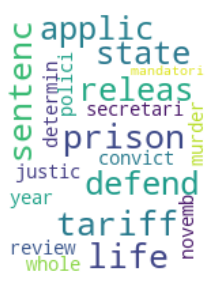

In [33]:
#generating word cloud
from wordcloud import WordCloud
text = dict(model_law.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph2.png')

In [34]:
#Genarating cosine similarity matrix for top 5 words
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_law =dict(model_law.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_law.keys()), 
                  index = list(top_words_law.keys()))

l = list(top_words_law.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled2.png')

cosine-similarity
           tariff     prison       life      would   sentenc
tariff          1   0.977417   0.977417   0.261261  0.987197
prison   0.977417          1          1  0.0513785   0.99861
life     0.977417          1          1  0.0513785   0.99861
would    0.261261  0.0513785  0.0513785          1  0.103953
sentenc  0.987197    0.99861    0.99861   0.103953         1


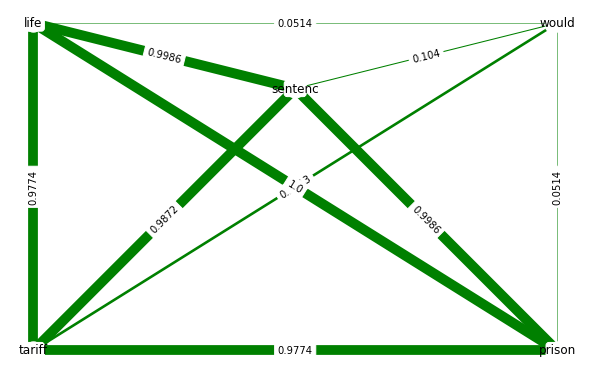

In [35]:
#generating networkx graph
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words_law.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig2.png')

### non-law-all.txt

In [36]:
#loading non law data set
document_list_nonlaw,titles_non_law,word_count_nonlaw=load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 2


In [37]:
#data preprocessing
clean_text_nonlaw=preprocess_data(document_list_nonlaw)

['hardest', 'case', 'myra', 'hindley', 'life', 'sentences', 'rule', 'myra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction', 'murders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known', 'moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousness', 'society', 'exaggeration', 'that', 'hindley', 'popularly', 'considered', 'embodiment', 'evil', 'over', 'last', 'years', 'mounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine', 'length', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hard', 'case', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom', 'thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'position', 'home', 'secretary', 'hardened', 'main', 'because', 'political', 'impact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'because', 'hindley', 'mandatory', 'life', 'prisoner', 'case', 'profound', 'impact', 'relating', 'such', 'prisoners', 'prevented', 'from', 'remaini

In [38]:
# LSA Model
number_of_topics=len(document_list_nonlaw)
words=word_count_nonlaw
model_nonlaw=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics,words)
words_from_law =dict(model_nonlaw.show_topic(0, topn=words))##dict and encoding matrix values

In [39]:
#These variables are for further experimentation in vertical comparission mantel test
model_nonlaw_p=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics_nonlaw,words)

In [40]:
#top words from non law
top_words_nonlaw = dict(model_nonlaw.show_topic(0, topn=5))

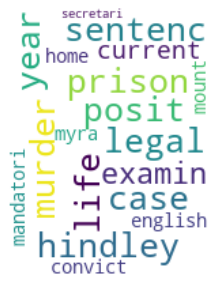

In [41]:
#word cloud API
from wordcloud import WordCloud
text = dict(model_nonlaw.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph3.png')

In [42]:
#Generating cosine similarity matrix for top 5 words
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_non_law =dict(model_nonlaw.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_non_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_nonlaw.keys()), 
                  index = list(top_words_nonlaw.keys()))

l = list(top_words_nonlaw.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled3.png')

cosine-similarity
             life    prison    sentenc    hindley     posit
life            1  0.884398   0.939851    0.32706  0.983158
prison   0.884398         1   0.671774   0.730316  0.954802
sentenc  0.939851  0.671774          1 -0.0154102  0.861596
hindley   0.32706  0.730316 -0.0154102          1  0.494258
posit    0.983158  0.954802   0.861596   0.494258         1


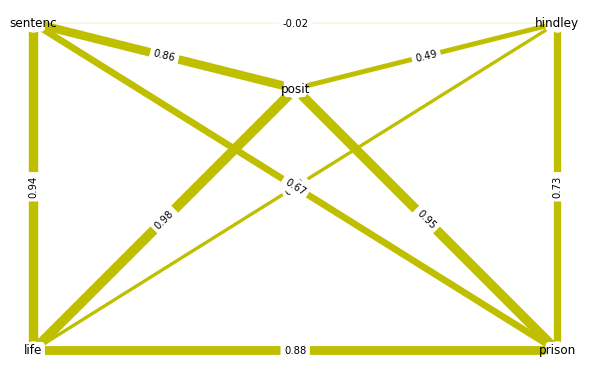

In [43]:
#Generating networkx graph
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words_nonlaw.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig3.png')

In [44]:
#mantel test with 10 word network(considering top 5 words from each space/corpus)
mantel_test_n(5)

Pairwise-distance
              life      prison      sentenc      hindley        posit  \
life             0           0    0.0862477      0.32587    0.0760228   
prison           0           0    0.0862477      0.32587    0.0760228   
sentenc  0.0862477   0.0862477            0     0.243335    0.0476128   
hindley    0.32587     0.32587     0.243335            0  5.82077e-11   
posit    0.0769168  0.00456744  1.49185e-05  1.61773e-10  2.02965e-20   
tariff   0.0868208   0.0868208    0.0994242     0.329301     0.083679   
would     0.566645    0.566645     0.498648     0.434104    0.0769168   

              tariff        would  
life       0.0868208     0.566645  
prison     0.0868208     0.566645  
sentenc    0.0994242     0.498648  
hindley     0.329301     0.434104  
posit    3.63936e-40  1.29804e-79  
tariff             0     0.497952  
would       0.497952            0  
Pairwise-distance
             life    prison   sentenc   hindley     posit tariff would
life            0  0

(-0.21510050761806546, 0.7146825396825397, -0.6849797026610109)

In [45]:
#mantel test with 20 word network(considering top 10 words from each space/corpus)
mantel_test_n(10)

Pairwise-distance
                life      prison      sentenc      hindley        posit  \
life               0           0    0.0862477      0.32587    0.0760228   
prison             0           0    0.0862477      0.32587    0.0760228   
sentenc    0.0862477   0.0862477            0     0.243335    0.0476128   
hindley      0.32587     0.32587     0.243335            0  5.82077e-11   
posit      0.0479145  0.00190993  2.89854e-06  7.58021e-12  5.67045e-23   
case        0.431239    0.431239     0.344991     0.141661  0.000145238   
legal      0.0478914  0.00190967  2.89854e-06  7.58021e-12  5.67045e-23   
murder      0.258743    0.258743     0.172495    0.0994242    0.0132425   
year        0.639062    0.639062     0.566645      0.47047    0.0906468   
examin     0.0541643  0.00630111   5.1881e-05  2.78852e-09  7.78069e-18   
tariff     0.0868208   0.0868208    0.0994242     0.329301     0.083679   
would       0.566645    0.566645     0.498648     0.434104    0.0769168   
applic 

(0.0672576924690458, 0.3238, 0.429976775223615)

### 3. LSA at Paragraph level 
#### Each paragraph is considered as each document in LSA

### law-text-all.txt

In [46]:
#loading dataset
def load_data(path,file_name):
    """
    Input  : path and file_name
    function: loading text file
    Output : number of words, document list
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [47]:
document_list_law,titles_law,word_count_law=load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 450


In [48]:
#data preprocessing/cleaning
clean_text_law=preprocess_data(document_list_law)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley']
['court', 'appeal']
['2000']
['hearing', 'dates', 'october', 'november', '1998']
['november', '1998']
['catchwords']
['prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997']
['headnote']
['1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 

In [49]:
# LSA Model
number_of_topics=10
words=word_count_law
model_law=create_gensim_lsa_model(clean_text_law,number_of_topics,words)
words_from_law =dict(model_law.show_topic(0, topn=words))##dict and encoding matrix values

In [50]:
#These variables are for further experimentation in vertical comparission mantel test
model_law_paragraph=create_gensim_lsa_model(clean_text_law,number_of_topics,words)

In [51]:
#top words from law
top_words_law = dict(model_law.show_topic(0, topn=5))

In [52]:
top_words_law

{'tariff': -0.37242371709012256,
 'secretari': -0.32565843907846326,
 'prison': -0.2623243437371956,
 'state': -0.246189257383677,
 'life': -0.23430512744365337}

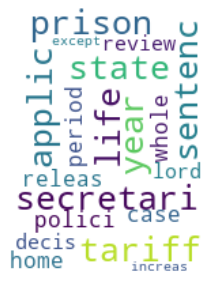

In [53]:
#word cloud API
from wordcloud import WordCloud
text = dict(model_law.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph4.png')

In [54]:
#generating cosine similarity matrix for top 5 words
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_law =dict(model_law.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_law.keys()), 
                  index = list(top_words_law.keys()))

l = list(top_words_law.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled4.png')

cosine-similarity
              tariff  secretari     prison      state       life
tariff             1   0.015984  0.0173414  0.0650695   0.341853
secretari   0.015984          1  0.0688782   0.707723  0.0437043
prison     0.0173414  0.0688782          1  -0.129393   0.481283
state      0.0650695   0.707723  -0.129393          1  0.0306939
life        0.341853  0.0437043   0.481283  0.0306939          1


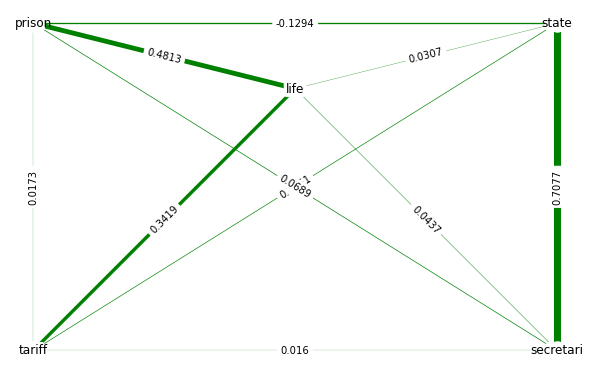

In [55]:
#generating NetworkX graph
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words_law.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig4.png')

### LSA for non-law-all.txt at paragraph level

In [56]:
#loading dataset
document_list_nonlaw,titles_nonlaw,word_count_nonlaw=load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 3038


In [57]:
#data preprocessing
clean_text_nonlaw=preprocess_data(document_list_nonlaw)

['hardest', 'case']
['myra', 'hindley', 'life', 'sentences']
['rule']
['myra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction']
['murders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known']
['moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousness']
['society', 'exaggeration', 'that', 'hindley', 'popularly']
['considered', 'embodiment', 'evil', 'over', 'last', 'years']
['mounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine']
['length', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hard']
['case', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom']
['thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'position']
['home', 'secretary', 'hardened', 'main', 'because', 'political']
['impact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'because']
['hindley', 'mandatory', 'life', 'prisoner', 'case', 'profound']
['impact', 'relating', 'such', 'prisoners', 'prevented', '

In [58]:
# LSA Model
number_of_topics=10
words=word_count_nonlaw
model_nonlaw=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics,words)
words_from_non_law =dict(model_nonlaw.show_topic(0, topn=words))#dict and encoding matrix values

In [59]:
#These variables are for further experimentation in vertical comparission mantel test
model_nonlaw_paragraph=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics_nonlaw,words)

In [60]:
#top 5 words from corpus
top_words_nonlaw=dict(model_nonlaw.show_topic(0, topn=5))

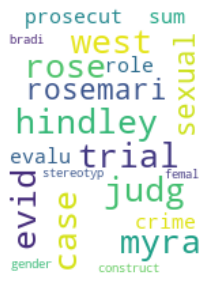

In [61]:
#word cloud API
from wordcloud import WordCloud
text = dict(model_nonlaw.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph5.png')

In [62]:
#generating networkx graph
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_non_law =dict(model_nonlaw.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_non_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_nonlaw.keys()), 
                  index = list(top_words_nonlaw.keys()))

l = list(top_words_nonlaw.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled5.png')

cosine-similarity
            hindley       myra        west        case      trial
hindley           1   0.983921 -0.00881068   0.0478939  0.0421957
myra       0.983921          1   0.0228122  -0.0318657 -0.0161314
west    -0.00881068  0.0228122           1  0.00632039 -0.0154812
case      0.0478939 -0.0318657  0.00632039           1 -0.0187634
trial     0.0421957 -0.0161314  -0.0154812  -0.0187634          1


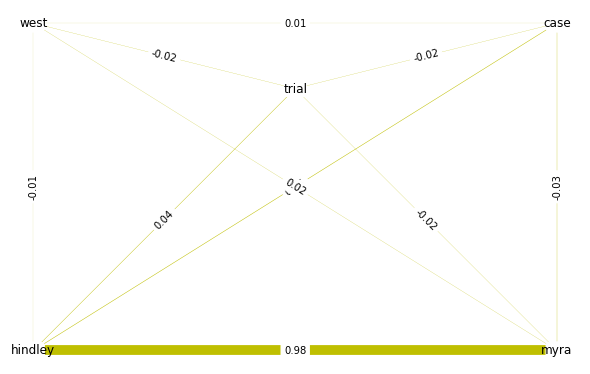

In [63]:
#generating networkx graph
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words_nonlaw.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig5.png')

In [64]:
#mantel test for 10 word network
mantel_test_n(5)

Pairwise-distance
             hindley       myra       west      case      trial    tariff  \
hindley            0  0.0784028   0.129538  0.137231  0.0885026  0.636498   
myra       0.0784028          0  0.0512993  0.180103   0.015536  0.579673   
west        0.129538  0.0512993          0  0.221424  0.0446334  0.549087   
case        0.137231   0.180103   0.221424         0   0.179304  0.602074   
trial      0.0885026   0.015536  0.0446334  0.179304          0  0.565805   
tariff      0.636498   0.579673   0.549087  0.602074   0.565805         0   
secretari   0.526375   0.483695   0.461748  0.499914   0.468835  0.400326   
prison      0.331798    0.39268   0.436945  0.225171   0.393358  0.758475   
state       0.411205   0.354725   0.325487   0.39167    0.33939   0.26503   
life        0.241964   0.227101   0.235447  0.165273   0.215431  0.445063   

          secretari    prison     state      life  
hindley    0.526375  0.331798  0.411205  0.241964  
myra       0.483695   0.39268 

(-0.2938292663700931, 0.8755, -1.2289763288122706)

In [65]:
#mantel test for 20 word network
mantel_test_n(10)

Pairwise-distance
             hindley         myra         west         case        trial  \
hindley            0    0.0784028     0.129538     0.137231    0.0885026   
myra       0.0784028            0    0.0512993     0.180103     0.015536   
west        0.129538    0.0512993            0     0.221424    0.0446334   
case        0.137231     0.180103     0.221424            0     0.179304   
trial      0.0885026     0.015536    0.0446334     0.179304            0   
judg       0.0937177    0.0584392    0.0800771     0.170092    0.0512974   
evid        0.123006    0.0448892    0.0087025     0.213429    0.0368198   
rose       0.0283766  0.000764967  5.83343e-07  3.40285e-13  1.15794e-25   
rosemari    0.129538    0.0512993            0     0.221424    0.0446334   
sexual      0.125155    0.0484582    0.0213863     0.211544     0.042284   
tariff      0.636498     0.579673     0.549087     0.602074     0.565805   
secretari   0.526375     0.483695     0.461748     0.499914     0.4688

(-0.3173243268962096, 0.9501, -1.7035781389263385)

### Vertical mantel test
### Considering two spaces in matel tests as
### Article level -----> 2-3 Paragraph level , 
### Article---->Paragraph level,
### Paragraph----> 2-3 Paragraph level.

In [66]:
#function definition for vertical mantel test
def mantel_test_verticle(model_a,model_b,n):
    
    # corpus of word from dataset
    words_law_article = dict(model_a.show_topic(0, topn=word_count_law))
    words_nonlaw_article = dict(model_b.show_topic(0, topn=word_count_nonlaw))
    
    # Top words from corpus of dataset
    top_words_law_article = dict(model_a.show_topic(0, topn=n)) 
    top_words_nonlaw_article = dict(model_b.show_topic(0,topn=n)) 

    
    c={} #law words in non law
    for key in top_words_law_article:
        try:
            c[key] = words_nonlaw_article[key]
        except KeyError:
            c[key] = 0

    top_words_nonlaw_article.update(c)

    b={} #non law words in law
    for key in top_words_nonlaw_article:
        try:
            b[key] = words_law_article[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_law_article)
    top_words_law_article=b

    #pairwise distance for law
    a=pd.DataFrame()

    for i in range(number_of_topics_law):
        words_from_law =dict(model_a.show_topic(i, topn=word_count_law))
        b=pd.DataFrame(words_from_law,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_law_article.keys()), 
                      index = list(top_words_law_article.keys()))

    l = list(top_words_law_article.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.empty((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()

    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics_nonlaw):
        words_from_nonlaw =dict(model_b.show_topic(i, topn=word_count_nonlaw))
        b=pd.DataFrame(words_from_nonlaw,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_nonlaw_article.keys()), 
                      index = list(top_words_nonlaw_article.keys()))

    l = list(top_words_nonlaw_article.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.empty((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()

    dist1 = list(df1[np.triu_indices(len(top_words_law_article), k = 1)])

    dist2 = list(df2[np.triu_indices(len(top_words_nonlaw_article), k = 1)])

    return mantel.test(dist1, dist2, perms=10000, method='pearson', tail='upper')

#### Now permutating the mantel test vertical with different parameters
#### mantel_test_vertical(X,Y,Z)
##### Where X is the pairwise distance for top words in space 1
#####             Y is the pairwise distance for top words in space 2
#####             Z is top words count from the corpus (ike 5 for 10 word network because 5 top words from each network)

In [67]:
mantel_test_verticle(model_law_articles,model_law_p,5)

Pairwise-distance
              tariff      life       prison     would   sentenc  secretari
tariff             0  0.120939     0.232028  0.258272  0.332822  0.0637207
life        0.120939         0     0.145085  0.149968  0.259531   0.151056
prison      0.232028  0.145085  5.26836e-09  0.120279  0.205853   0.261221
would       0.258272  0.149968     0.120279         0   0.28494   0.267141
sentenc     0.332822  0.259531     0.205853   0.28494         0   0.387682
secretari  0.0637207  0.151056     0.261221  0.267141  0.387682          0
Pairwise-distance
             tariff       life     prison        would    sentenc secretari
tariff            0   0.100252   0.100252     0.574985   0.114805  0.503191
life       0.100252          0          0     0.654305  0.0995903  0.574985
prison     0.100252          0          0     0.654305  0.0995903  0.574985
would      0.574985   0.654305   0.654305  7.45058e-09   0.575789  0.100252
sentenc    0.114805  0.0995903  0.0995903     0.575789     

(-0.09916507921711057, 0.5375, -0.3690476704795733)

In [68]:
mantel_test_verticle(model_law_articles,model_law_paragraph,5)

Pairwise-distance
              tariff  secretari       prison      state       life   sentenc
tariff             0  0.0637207     0.232028    0.15016   0.120939  0.332822
secretari  0.0637207          0     0.261221   0.169954   0.151056  0.387682
prison      0.232028   0.261221  5.26836e-09   0.151278   0.145085  0.205853
state        0.15016   0.169954     0.151278          0  0.0374941  0.272043
life        0.120939   0.151056     0.145085  0.0374941          0  0.259531
sentenc     0.332822   0.387682     0.205853   0.272043   0.259531         0
Pairwise-distance
             tariff secretari    prison        state      life   sentenc
tariff            0  0.765735   0.77712     0.685419  0.545216    0.9588
secretari  0.765735         0   0.77581     0.223868    0.4977   0.55359
prison      0.77712   0.77581         0     0.725435  0.360182  0.453199
state      0.685419  0.223868  0.725435  7.45058e-09  0.397462  0.599999
life       0.545216    0.4977  0.360182     0.397462        

(0.3053976237895093, 0.18333333333333332, 1.0030740639168316)

In [69]:
mantel_test_verticle(model_law_p,model_law_paragraph,5)

Pairwise-distance
              tariff    secretari     prison        state       life  \
tariff             0     0.435776  0.0868208     0.435776  0.0868208   
secretari   0.435776            0   0.497952  4.56253e-09   0.497952   
prison     0.0868208     0.497952          0     0.497952          0   
state       0.435776  4.56253e-09   0.497952            0   0.497952   
life       0.0868208     0.497952          0     0.497952          0   
would       0.497952    0.0868208   0.566645    0.0868208   0.566645   
sentenc    0.0994242     0.424983  0.0862477     0.424983  0.0862477   

                 would    sentenc  
tariff        0.497952  0.0994242  
secretari    0.0868208   0.424983  
prison        0.566645  0.0862477  
state        0.0868208   0.424983  
life          0.566645  0.0862477  
would      6.45239e-09   0.498648  
sentenc       0.498648          0  
Pairwise-distance
             tariff secretari    prison        state      life     would  \
tariff            0  0.

(0.21550056661770486, 0.14563492063492064, 1.2101451108283177)

In [70]:
mantel_test_verticle(model_nonlaw_articles,model_nonlaw_p,5)

Pairwise-distance
              life     prison    sentenc      hindley     posit       judg  \
life             0  0.0216444  0.0469567     0.334628  0.224606   0.496303   
prison   0.0216444          0  0.0684412     0.330479  0.204074   0.480841   
sentenc  0.0469567  0.0684412          0     0.344174  0.269148   0.527287   
hindley   0.334628   0.330479   0.344174  7.45058e-09   0.30344   0.542007   
posit     0.224606   0.204074   0.269148      0.30344         0   0.404405   
judg      0.496303   0.480841   0.527287     0.542007  0.404405          0   
evid      0.527448   0.510394    0.56174     0.548878  0.406662  0.0688449   
west      0.483563   0.465846   0.519092     0.395017  0.319641   0.243415   
trial     0.454197   0.437227   0.488437     0.484199  0.339509  0.0747509   
case      0.214395    0.20829   0.228303     0.337326  0.270718   0.325846   

              evid      west      trial      case  
life      0.527448  0.483563   0.454197  0.214395  
prison    0.510394 

(0.08840656075950774, 0.2378, 0.717883441882129)

In [71]:
mantel_test_verticle(model_nonlaw_articles,model_nonlaw_paragraph,5)

Pairwise-distance
             hindley      myra      west      case      trial       judg  \
hindley  7.45058e-09  0.237658  0.395017  0.337326   0.484199   0.542007   
myra        0.237658         0  0.394325  0.516241   0.544477   0.613851   
west        0.395017  0.394325         0  0.360842   0.180653   0.243415   
case        0.337326  0.516241  0.360842         0   0.299921   0.325846   
trial       0.484199  0.544477  0.180653  0.299921          0  0.0747509   
judg        0.542007  0.613851  0.243415  0.325846  0.0747509          0   
evid        0.548878  0.593246  0.207301   0.36982  0.0742805  0.0688449   

              evid  
hindley   0.548878  
myra      0.593246  
west      0.207301  
case       0.36982  
trial    0.0742805  
judg     0.0688449  
evid             0  
Pairwise-distance
             hindley       myra         west      case     trial      judg  \
hindley  1.49012e-08  0.0768328      1.08226   1.07419  0.718202   0.86107   
myra       0.0768328          0

(0.4352705438101315, 0.01607142857142857, 1.8125757664135276)

In [72]:
mantel_test_verticle(model_nonlaw_p,model_nonlaw_paragraph,5)

Pairwise-distance
          hindley        myra         west        case        trial  \
hindley         0    0.295565    0.0988342    0.269285     0.534627   
myra     0.295565           0            0    0.184174     0.269285   
west     0.052347  0.00295619  8.71391e-06  7.5876e-11  5.75716e-21   
case     0.269285    0.184174    0.0454554           0     0.295565   
trial    0.534627    0.269285    0.0200079    0.295565   1.6131e-09   
life     0.613776    0.561593     0.173406    0.397067     0.471467   
prison   0.354275    0.368348     0.128873    0.184174     0.412362   
sentenc  0.689941    0.547815    0.0856048    0.430351     0.367747   
posit    0.439429      0.2978     0.052347    0.172485     0.226474   

                life       prison   sentenc     posit  
hindley     0.613776     0.354275  0.689941  0.439429  
myra        0.561593     0.368348  0.547815    0.2978  
west     3.31449e-41  1.09858e-81         0         0  
case        0.397067     0.184174  0.430351  0.

(-0.24334998239960287, 0.769, -0.8761591379644526)

In [73]:
mantel_test_verticle(model_law_articles,model_law_p,10)

Pairwise-distance
              tariff       life       prison      would   sentenc    applic  \
tariff             0   0.120939     0.232028   0.258272  0.332822  0.451002   
life        0.120939          0     0.145085   0.149968  0.259531  0.475568   
prison      0.232028   0.145085  5.26836e-09   0.120279  0.205853   0.56496   
would       0.258272   0.149968     0.120279          0   0.28494  0.492418   
sentenc     0.332822   0.259531     0.205853    0.28494         0  0.733052   
applic      0.451002   0.475568      0.56496   0.492418  0.733052         0   
defend      0.340065   0.227082      0.22912   0.119524    0.3402  0.502039   
secretari  0.0637207   0.151056     0.261221   0.267141  0.387682  0.390274   
state        0.15016  0.0374941     0.151278   0.126576  0.272043  0.462135   
releas      0.254715   0.138724     0.166021  0.0755174  0.283777  0.487318   
home        0.207318   0.208298     0.318915   0.257107  0.465717  0.271131   
polici      0.257145   0.157197   

(-0.16939566079794502, 0.9638, -1.6117766885941305)

In [74]:
mantel_test_verticle(model_law_articles,model_law_paragraph,10)

Pairwise-distance
              tariff  secretari       prison      state       life    applic  \
tariff             0  0.0637207     0.232028    0.15016   0.120939  0.451002   
secretari  0.0637207          0     0.261221   0.169954   0.151056  0.390274   
prison      0.232028   0.261221  5.26836e-09   0.151278   0.145085   0.56496   
state        0.15016   0.169954     0.151278          0  0.0374941  0.462135   
life        0.120939   0.151056     0.145085  0.0374941          0  0.475568   
applic      0.451002   0.390274      0.56496   0.462135   0.475568         0   
would       0.258272   0.267141     0.120279   0.126576   0.149968  0.492418   
sentenc     0.332822   0.387682     0.205853   0.272043   0.259531  0.733052   
year        0.262775   0.238605     0.269973   0.167206   0.198385  0.339789   
polici      0.257145   0.302737       0.1366   0.159886   0.157197  0.620691   
home        0.207318   0.161884     0.318915   0.194701   0.208298  0.271131   
lord        0.306809  

(0.2900323613376957, 0.1037, 1.4505110526178315)

In [75]:
mantel_test_verticle(model_law_p,model_law_paragraph,10)

Pairwise-distance
              tariff    secretari     prison        state       life  \
tariff             0     0.435776  0.0868208     0.435776  0.0868208   
secretari   0.435776            0   0.497952  4.56253e-09   0.497952   
prison     0.0868208     0.497952          0     0.497952          0   
state       0.435776  4.56253e-09   0.497952            0   0.497952   
life       0.0868208     0.497952          0     0.497952          0   
applic      0.172495     0.283322   0.217888     0.283322   0.217888   
would       0.497952    0.0868208   0.566645    0.0868208   0.566645   
sentenc    0.0994242     0.424983  0.0862477     0.424983  0.0862477   
year        0.574611     0.141661   0.639062     0.141661   0.639062   
polici      0.243335     0.300921   0.258743     0.300921   0.258743   
defend        0.2996     0.141661   0.357278     0.141661   0.357278   
releas      0.435776  4.56253e-09   0.497952            0   0.497952   

              applic        would    sentenc 

(0.19492919313165646, 0.0522, 1.7138470882595096)

In [76]:
mantel_test_verticle(model_nonlaw_articles,model_nonlaw_p,10)

Pairwise-distance
               life     prison    sentenc      hindley      posit      case  \
life              0  0.0216444  0.0469567     0.334628   0.224606  0.214395   
prison    0.0216444          0  0.0684412     0.330479   0.204074   0.20829   
sentenc   0.0469567  0.0684412          0     0.344174   0.269148  0.228303   
hindley    0.334628   0.330479   0.344174  7.45058e-09    0.30344  0.337326   
posit      0.224606   0.204074   0.269148      0.30344          0  0.270718   
case       0.214395    0.20829   0.228303     0.337326   0.270718         0   
legal      0.208703   0.187622   0.253146     0.332215  0.0814757  0.208083   
murder     0.213562   0.194733   0.254492     0.255943  0.0482216  0.252229   
year        0.17492   0.154163   0.220203     0.305946  0.0509412  0.245663   
examin     0.264012   0.242762   0.309413     0.334797    0.05295  0.278732   
judg       0.496303   0.480841   0.527287     0.542007   0.404405  0.325846   
evid       0.527448   0.510394    

(0.094777824359701, 0.2193, 0.8037646377440892)

In [77]:
mantel_test_verticle(model_nonlaw_articles,model_nonlaw_paragraph,10)

Pairwise-distance
              hindley      myra      west      case      trial       judg  \
hindley   7.45058e-09  0.237658  0.395017  0.337326   0.484199   0.542007   
myra         0.237658         0  0.394325  0.516241   0.544477   0.613851   
west         0.395017  0.394325         0  0.360842   0.180653   0.243415   
case         0.337326  0.516241  0.360842         0   0.299921   0.325846   
trial        0.484199  0.544477  0.180653  0.299921          0  0.0747509   
judg         0.542007  0.613851  0.243415  0.325846  0.0747509          0   
evid         0.548878  0.593246  0.207301   0.36982  0.0742805  0.0688449   
rose         0.427429   0.46931  0.166745  0.288341   0.120457   0.190762   
rosemari     0.297464  0.296499  0.257641  0.337465   0.331523    0.40452   
sexual       0.308793  0.308785  0.154232  0.321663    0.25391    0.32808   
sum          0.458625  0.505077  0.178499  0.296207  0.0891482   0.155287   
prosecut     0.433187  0.477881  0.180205  0.286058   0.12

(0.5576188325873267, 0.0014, 2.730142165096608)

In [78]:
mantel_test_verticle(model_nonlaw_p,model_nonlaw_paragraph,10)

Pairwise-distance
            hindley         myra         west         case        trial  \
hindley           0     0.295565    0.0988342     0.269285     0.534627   
myra       0.295565            0            0     0.184174     0.269285   
west       0.007941  0.000296108  2.39467e-07  9.08767e-14  9.15363e-27   
case       0.269285     0.184174    0.0454554            0     0.295565   
trial      0.534627     0.269285    0.0200079     0.295565   1.6131e-09   
judg       0.534627     0.269285    0.0200079     0.295565  1.14063e-09   
evid      0.0143273  0.000265463  7.06084e-08  4.92559e-15  2.42522e-29   
rose              0            0            0            0            0   
rosemari          0            0            0            0            0   
sexual            0            0            0            0            0   
life       0.613776     0.561593     0.173406     0.397067     0.471467   
prison     0.354275     0.368348     0.128873     0.184174     0.412362   
sentenc

(-0.11203935421583293, 0.7197, -0.577035833430325)